In [210]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore') 

In [211]:
data_all = pd.read_csv("./데이터/2. 선정기업자료.csv",encoding='cp949',index_col=0)
backtest_all = pd.read_csv("./데이터/2. 주식데이터.csv",encoding='cp949',index_col=0)
kosdaq = pd.read_csv("./데이터/1. 코스닥 데이터.csv",encoding='cp949')

In [212]:
data_all 

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,자기자본증가율,총자본증가율,매출액순이익률,...,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-2.02,1.98,-8.50,...,2.0,2.0,4.0,2.0,7.0,7.0,1.0,1.0,4.0,5.0
1,(주)ES큐브,50120,2011-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,-7.92,12.78,-8.99,...,2.0,2.0,2.0,2.0,8.0,8.0,2.0,4.0,6.0,6.0
2,(주)가비아,79940,2011-12-01,2005-10-19,NaN,5,출판업,30.73,22.76,13.28,...,9.0,9.0,9.0,10.0,6.0,8.0,3.0,10.0,8.0,10.0
3,(주)고영테크놀러지,98460,2011-12-01,2008-06-03,NaN,5,기타 기계 및 장비 제조업,26.23,23.10,18.15,...,10.0,10.0,10.0,10.0,10.0,9.0,9.0,3.0,7.0,8.0
4,(주)골드앤에스,35290,2011-12-01,1999-12-07,NaN,5,출판업,3.73,3.62,2.11,...,5.0,5.0,5.0,5.0,3.0,4.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,현우산업(주),92300,2020-12-01,2007-10-24,NaN,5,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",-0.34,4.88,0.73,...,5.0,5.0,4.0,5.0,5.0,3.0,6.0,6.0,8.0,5.0
632,화성밸브(주),39610,2020-12-01,2000-03-16,NaN,5,기타 기계 및 장비 제조업,2.71,5.94,-0.36,...,4.0,4.0,3.0,4.0,8.0,10.0,5.0,2.0,8.0,3.0
633,화일약품(주),61250,2020-12-01,2002-04-18,NaN,5,의료용 물질 및 의약품 제조업,31.34,21.72,-45.71,...,1.0,1.0,4.0,1.0,1.0,2.0,3.0,6.0,4.0,1.0
634,휴림로봇(주),90710,2020-12-01,2006-12-05,NaN,5,기타 기계 및 장비 제조업,166.38,217.64,197.71,...,10.0,10.0,1.0,10.0,2.0,5.0,3.0,2.0,1.0,10.0


In [213]:
data_all[["회사명",'총점수', '자기자본증가율_점수', '총자본증가율_점수', '매출액순이익률_점수',
       '자기자본순이익률_점수', '총자본사업이익률_점수', '총자본순이익률_점수', '순운전자본비율_점수', '자기자본구성비율_점수',
       '자기자본배율_점수', '매출채권회전기간_점수', '순운전자본회전률_점수', '부가가치율_점수']]

,회사명,총점수,자기자본증가율_점수,총자본증가율_점수,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수
0,(주)CMG제약,42.0,3.0,4.0,2.0,2.0,4.0,2.0,7.0,7.0,1.0,1.0,4.0,5.0
1,(주)ES큐브,51.0,2.0,7.0,2.0,2.0,2.0,2.0,8.0,8.0,2.0,4.0,6.0,6.0
2,(주)가비아,101.0,10.0,9.0,9.0,9.0,9.0,10.0,6.0,8.0,3.0,10.0,8.0,10.0
3,(주)고영테크놀러지,104.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,3.0,7.0,8.0
4,(주)골드앤에스,58.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,현우산업(주),61.0,3.0,6.0,5.0,5.0,4.0,5.0,5.0,3.0,6.0,6.0,8.0,5.0
632,화성밸브(주),62.0,5.0,6.0,4.0,4.0,3.0,4.0,8.0,10.0,5.0,2.0,8.0,3.0
633,화일약품(주),42.0,9.0,9.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,6.0,4.0,1.0
634,휴림로봇(주),74.0,10.0,10.0,10.0,10.0,1.0,10.0,2.0,5.0,3.0,2.0,1.0,10.0


In [214]:
top10_2011 = data_all[data_all["투자년도"]==2011].sort_values("총점수",ascending=False)[:10]
top10_2012 = data_all[data_all["투자년도"]==2012].sort_values("총점수",ascending=False)[:10]
top10_2013 = data_all[data_all["투자년도"]==2013].sort_values("총점수",ascending=False)[:10]
top10_2014 = data_all[data_all["투자년도"]==2014].sort_values("총점수",ascending=False)[:10]
top10_2015 = data_all[data_all["투자년도"]==2015].sort_values("총점수",ascending=False)[:10]
top10_2016 = data_all[data_all["투자년도"]==2016].sort_values("총점수",ascending=False)[:10]
top10_2017 = data_all[data_all["투자년도"]==2017].sort_values("총점수",ascending=False)[:10]
top10_2018 = data_all[data_all["투자년도"]==2018].sort_values("총점수",ascending=False)[:10]
top10_2019 = data_all[data_all["투자년도"]==2019].sort_values("총점수",ascending=False)[:10]
top10_2020 = data_all[data_all["투자년도"]==2020].sort_values("총점수",ascending=False)[:10]


In [266]:
pd.concat([top10_2011,top10_2012,top10_2013,top10_2014,top10_2015,top10_2016,top10_2017,top10_2018,top10_2019,top10_2020]).mean()


거래소코드          64395.0000
소속코드               4.9900
자기자본증가율           38.3754
총자본증가율            37.9083
매출액순이익률           20.7443
자기자본순이익률          24.2505
총자본사업이익률          23.9420
총자본순이익률           19.5318
순운전자본비율           49.0365
자기자본구성비율          83.6853
자기자본배율          2998.1071
매출채권회전기간          39.0952
순운전자본회전률           1.3364
부가가치율             45.7852
label              0.0200
투자년도            2015.5000
티커             64395.0000
총점수              107.8400
자기자본증가율_점수         8.8900
총자본증가율_점수          8.8900
매출액순이익률_점수         9.7400
자기자본순이익률_점수        9.6800
총자본사업이익률_점수        9.9000
총자본순이익률_점수         9.9700
순운전자본비율_점수         8.9800
자기자본구성비율_점수        9.2000
자기자본배율_점수          8.3600
매출채권회전기간_점수        8.1100
순운전자본회전률_점수        7.1900
부가가치율_점수           8.9300
dtype: float64

In [215]:
backtest_2011 = backtest_all[backtest_all["Date"].str.contains('2011')]
backtest_2012 = backtest_all[backtest_all["Date"].str.contains('2012')]
backtest_2013 = backtest_all[backtest_all["Date"].str.contains('2013')]
backtest_2014 = backtest_all[backtest_all["Date"].str.contains('2014')]
backtest_2015 = backtest_all[backtest_all["Date"].str.contains('2015')]
backtest_2016 = backtest_all[backtest_all["Date"].str.contains('2016')]
backtest_2017 = backtest_all[backtest_all["Date"].str.contains('2017')]
backtest_2018 = backtest_all[backtest_all["Date"].str.contains('2018')]
backtest_2019 = backtest_all[backtest_all["Date"].str.contains('2019')]
backtest_2020 = backtest_all[backtest_all["Date"].str.contains('2020')]

In [216]:
kosdaq_2011 = kosdaq[kosdaq["Date"].str.contains('2011')].set_index('Date')
kosdaq_2012 = kosdaq[kosdaq["Date"].str.contains('2012')].set_index('Date')
kosdaq_2013 = kosdaq[kosdaq["Date"].str.contains('2013')].set_index('Date')
kosdaq_2014 = kosdaq[kosdaq["Date"].str.contains('2014')].set_index('Date')
kosdaq_2015 = kosdaq[kosdaq["Date"].str.contains('2015')].set_index('Date')
kosdaq_2016 = kosdaq[kosdaq["Date"].str.contains('2016')].set_index('Date')
kosdaq_2017 = kosdaq[kosdaq["Date"].str.contains('2017')].set_index('Date')
kosdaq_2018 = kosdaq[kosdaq["Date"].str.contains('2018')].set_index('Date')
kosdaq_2019 = kosdaq[kosdaq["Date"].str.contains('2019')].set_index('Date')
kosdaq_2020 = kosdaq[kosdaq["Date"].str.contains('2020')].set_index('Date')

In [217]:
top10_2011_data = pd.merge(backtest_2011, top10_2011, how='right',on ='회사명')
top10_2012_data = pd.merge(backtest_2012, top10_2012, how='right',on ='회사명')
top10_2013_data = pd.merge(backtest_2013, top10_2013, how='right',on ='회사명')
top10_2014_data = pd.merge(backtest_2014, top10_2014, how='right',on ='회사명')
top10_2015_data = pd.merge(backtest_2015, top10_2015, how='right',on ='회사명')
top10_2016_data = pd.merge(backtest_2016, top10_2016, how='right',on ='회사명')
top10_2017_data = pd.merge(backtest_2017, top10_2017, how='right',on ='회사명')
top10_2018_data = pd.merge(backtest_2018, top10_2018, how='right',on ='회사명')
top10_2019_data = pd.merge(backtest_2019, top10_2019, how='right',on ='회사명')
top10_2020_data = pd.merge(backtest_2020, top10_2020, how='right',on ='회사명')


In [218]:
col = ['회사명',"Date",'총점수', '자기자본증가율_점수', '총자본증가율_점수', '매출액순이익률_점수',
       '자기자본순이익률_점수', '총자본사업이익률_점수', '총자본순이익률_점수', '순운전자본비율_점수', '자기자본구성비율_점수',
       '자기자본배율_점수', '매출채권회전기간_점수', '순운전자본회전률_점수', '부가가치율_점수','Close']

In [219]:
top10_2011_data =top10_2011_data[col] 
top10_2012_data =top10_2012_data[col] 
top10_2013_data =top10_2013_data[col] 
top10_2014_data =top10_2014_data[col] 
top10_2015_data =top10_2015_data[col] 
top10_2016_data =top10_2016_data[col] 
top10_2017_data =top10_2017_data[col] 
top10_2018_data =top10_2018_data[col] 
top10_2019_data =top10_2019_data[col] 
top10_2020_data =top10_2020_data[col] 

In [220]:
top10_2011_data["회사명"].unique()

array(['메가스터디(주)', '(주)아즈텍더블유비이', '(주)빅솔론', '(주)에이스침대', '(주)제주반도체',
       '(주)컴투스홀딩스', '대한광통신(주)', '(주)티브로드한빛방송', '(주)카카오', '(주)유진테크'],
      dtype=object)

In [221]:
name_list_2011 = top10_2011_data["회사명"].unique()
name_list_2012 = top10_2012_data["회사명"].unique()
name_list_2013 = top10_2013_data["회사명"].unique()
name_list_2014 = top10_2014_data["회사명"].unique()
name_list_2015 = top10_2015_data["회사명"].unique()
name_list_2016 = top10_2016_data["회사명"].unique()
name_list_2017 = top10_2017_data["회사명"].unique()
name_list_2018 = top10_2018_data["회사명"].unique()
name_list_2019 = top10_2019_data["회사명"].unique()
name_list_2020 = top10_2020_data["회사명"].unique()

In [222]:
top10_2011_data

,회사명,Date,총점수,자기자본증가율_점수,총자본증가율_점수,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수,Close
0,메가스터디(주),2011-01-03,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,30744
1,메가스터디(주),2011-01-04,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,31739
2,메가스터디(주),2011-01-05,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32161
3,메가스터디(주),2011-01-06,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32330
4,메가스터디(주),2011-01-07,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,(주)유진테크,2011-12-23,105.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,6.0,7.0,8.0,6.0,9.0,12845
2476,(주)유진테크,2011-12-26,105.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,6.0,7.0,8.0,6.0,9.0,12875
2477,(주)유진테크,2011-12-27,105.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,6.0,7.0,8.0,6.0,9.0,13139
2478,(주)유진테크,2011-12-28,105.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,6.0,7.0,8.0,6.0,9.0,13951


In [223]:
top10_2011_data = top10_2011_data[["Date","Close","회사명"]]
top10_2011_data.set_index("Date",inplace=True)
top10_2012_data = top10_2012_data[["Date","Close","회사명"]]
top10_2012_data.set_index("Date",inplace=True)
top10_2013_data = top10_2013_data[["Date","Close","회사명"]]
top10_2013_data.set_index("Date",inplace=True)
top10_2014_data = top10_2014_data[["Date","Close","회사명"]]
top10_2014_data.set_index("Date",inplace=True)
top10_2015_data = top10_2015_data[["Date","Close","회사명"]]
top10_2015_data.set_index("Date",inplace=True)
top10_2016_data = top10_2016_data[["Date","Close","회사명"]]
top10_2016_data.set_index("Date",inplace=True)
top10_2017_data = top10_2017_data[["Date","Close","회사명"]]
top10_2017_data.set_index("Date",inplace=True)
top10_2018_data = top10_2018_data[["Date","Close","회사명"]]
top10_2018_data.set_index("Date",inplace=True)
top10_2019_data = top10_2019_data[["Date","Close","회사명"]]
top10_2019_data.set_index("Date",inplace=True)
top10_2020_data = top10_2020_data[["Date","Close","회사명"]]
top10_2020_data.set_index("Date",inplace=True)

In [224]:
top10_2011_pct = pd.DataFrame()
top10_2011_pct.index = top10_2011_data.index
top10_2012_pct = pd.DataFrame()
top10_2012_pct.index = top10_2012_data.index
top10_2013_pct = pd.DataFrame()
top10_2013_pct.index = top10_2013_data.index
top10_2014_pct = pd.DataFrame()
top10_2014_pct.index = top10_2014_data.index
top10_2015_pct = pd.DataFrame()
top10_2015_pct.index = top10_2015_data.index
top10_2016_pct = pd.DataFrame()
top10_2016_pct.index = top10_2016_data.index
top10_2017_pct = pd.DataFrame()
top10_2017_pct.index = top10_2017_data.index
top10_2018_pct = pd.DataFrame()
top10_2018_pct.index = top10_2018_data.index
top10_2019_pct = pd.DataFrame()
top10_2019_pct.index = top10_2019_data.index
top10_2020_pct = pd.DataFrame()
top10_2020_pct.index = top10_2020_data.index

In [225]:
for i in name_list_2011:
    top10_2011_pct[i] = top10_2011_data[top10_2011_data["회사명"]==i]["Close"]
    top10_2011_pct[i] =top10_2011_pct[i]/top10_2011_pct[i][0]
top10_2011_pct["포트폴리오 누적수익률"] = top10_2011_pct[name_list_2011[0]]
for i in name_list_2011:
        top10_2011_pct["포트폴리오 누적수익률"] = top10_2011_pct[i] + top10_2011_pct["포트폴리오 누적수익률"]

top10_2011_pct["포트폴리오 누적수익률"] = top10_2011_pct["포트폴리오 누적수익률"] - top10_2011_pct[name_list_2011[0]]
top10_2011_pct["포트폴리오 누적수익률"] = top10_2011_pct["포트폴리오 누적수익률"]/10
top10_2011_pct["포트폴리오 누적수익률"] = top10_2011_pct["포트폴리오 누적수익률"]
top10_2011_pct['포트폴리오 일일수익률'] = top10_2011_pct['포트폴리오 누적수익률'].pct_change()

In [226]:
for i in name_list_2012:
    top10_2012_pct[i] = top10_2012_data[top10_2012_data["회사명"]==i]["Close"]
    top10_2012_pct[i] =top10_2012_pct[i]/top10_2012_pct[i][0]
top10_2012_pct["포트폴리오 누적수익률"] = top10_2012_pct[name_list_2012[0]]
for i in name_list_2012:
        top10_2012_pct["포트폴리오 누적수익률"] = top10_2012_pct[i] + top10_2012_pct["포트폴리오 누적수익률"]

top10_2012_pct["포트폴리오 누적수익률"] = top10_2012_pct["포트폴리오 누적수익률"] - top10_2012_pct[name_list_2012[0]]
top10_2012_pct["포트폴리오 누적수익률"] = top10_2012_pct["포트폴리오 누적수익률"]/10
top10_2012_pct["포트폴리오 누적수익률"] = top10_2012_pct["포트폴리오 누적수익률"]
top10_2012_pct['포트폴리오 일일수익률'] = top10_2012_pct['포트폴리오 누적수익률'].pct_change()


In [227]:
for i in name_list_2013:
    top10_2013_pct[i] = top10_2013_data[top10_2013_data["회사명"]==i]["Close"]
    top10_2013_pct[i] =top10_2013_pct[i]/top10_2013_pct[i][0]
top10_2013_pct["포트폴리오 누적수익률"] = top10_2013_pct[name_list_2013[0]]
for i in name_list_2013:
        top10_2013_pct["포트폴리오 누적수익률"] = top10_2013_pct[i] + top10_2013_pct["포트폴리오 누적수익률"]

top10_2013_pct["포트폴리오 누적수익률"] = top10_2013_pct["포트폴리오 누적수익률"] - top10_2013_pct[name_list_2013[0]]
top10_2013_pct["포트폴리오 누적수익률"] = top10_2013_pct["포트폴리오 누적수익률"]/10
top10_2013_pct["포트폴리오 누적수익률"] = top10_2013_pct["포트폴리오 누적수익률"]
top10_2013_pct['포트폴리오 일일수익률'] = top10_2013_pct['포트폴리오 누적수익률'].pct_change()


In [228]:
for i in name_list_2014:
    top10_2014_pct[i] = top10_2014_data[top10_2014_data["회사명"]==i]["Close"]
    top10_2014_pct[i] =top10_2014_pct[i]/top10_2014_pct[i][0]
top10_2014_pct["포트폴리오 누적수익률"] = top10_2014_pct[name_list_2014[0]]
for i in name_list_2014:
        top10_2014_pct["포트폴리오 누적수익률"] = top10_2014_pct[i] + top10_2014_pct["포트폴리오 누적수익률"]

top10_2014_pct["포트폴리오 누적수익률"] = top10_2014_pct["포트폴리오 누적수익률"] - top10_2014_pct[name_list_2014[0]]
top10_2014_pct["포트폴리오 누적수익률"] = top10_2014_pct["포트폴리오 누적수익률"]/10
top10_2014_pct["포트폴리오 누적수익률"] = top10_2014_pct["포트폴리오 누적수익률"]
top10_2014_pct['포트폴리오 일일수익률'] = top10_2014_pct['포트폴리오 누적수익률'].pct_change()


In [229]:
for i in name_list_2015:
    top10_2015_pct[i] = top10_2015_data[top10_2015_data["회사명"]==i]["Close"]
    top10_2015_pct[i] =top10_2015_pct[i]/top10_2015_pct[i][0]
top10_2015_pct["포트폴리오 누적수익률"] = top10_2015_pct[name_list_2015[0]]
for i in name_list_2015:
        top10_2015_pct["포트폴리오 누적수익률"] = top10_2015_pct[i] + top10_2015_pct["포트폴리오 누적수익률"]

top10_2015_pct["포트폴리오 누적수익률"] = top10_2015_pct["포트폴리오 누적수익률"] - top10_2015_pct[name_list_2015[0]]
top10_2015_pct["포트폴리오 누적수익률"] = top10_2015_pct["포트폴리오 누적수익률"]/10
top10_2015_pct["포트폴리오 누적수익률"] = top10_2015_pct["포트폴리오 누적수익률"]
top10_2015_pct['포트폴리오 일일수익률'] = top10_2015_pct['포트폴리오 누적수익률'].pct_change()


In [230]:
for i in name_list_2016:
    top10_2016_pct[i] = top10_2016_data[top10_2016_data["회사명"]==i]["Close"]
    top10_2016_pct[i] =top10_2016_pct[i]/top10_2016_pct[i][0]
top10_2016_pct["포트폴리오 누적수익률"] = top10_2016_pct[name_list_2016[0]]
for i in name_list_2016:
        top10_2016_pct["포트폴리오 누적수익률"] = top10_2016_pct[i] + top10_2016_pct["포트폴리오 누적수익률"]

top10_2016_pct["포트폴리오 누적수익률"] = top10_2016_pct["포트폴리오 누적수익률"] - top10_2016_pct[name_list_2016[0]]
top10_2016_pct["포트폴리오 누적수익률"] = top10_2016_pct["포트폴리오 누적수익률"]/10
top10_2016_pct["포트폴리오 누적수익률"] = top10_2016_pct["포트폴리오 누적수익률"]
top10_2016_pct['포트폴리오 일일수익률'] = top10_2016_pct['포트폴리오 누적수익률'].pct_change()


In [231]:
for i in name_list_2017:
    top10_2017_pct[i] = top10_2017_data[top10_2017_data["회사명"]==i]["Close"]
    top10_2017_pct[i] =top10_2017_pct[i]/top10_2017_pct[i][0]
top10_2017_pct["포트폴리오 누적수익률"] = top10_2017_pct[name_list_2017[0]]
for i in name_list_2017:
        top10_2017_pct["포트폴리오 누적수익률"] = top10_2017_pct[i] + top10_2017_pct["포트폴리오 누적수익률"]

top10_2017_pct["포트폴리오 누적수익률"] = top10_2017_pct["포트폴리오 누적수익률"] - top10_2017_pct[name_list_2017[0]]
top10_2017_pct["포트폴리오 누적수익률"] = top10_2017_pct["포트폴리오 누적수익률"]/10
top10_2017_pct["포트폴리오 누적수익률"] = top10_2017_pct["포트폴리오 누적수익률"]
top10_2017_pct['포트폴리오 일일수익률'] = top10_2017_pct['포트폴리오 누적수익률'].pct_change()


In [232]:
for i in name_list_2018:
    top10_2018_pct[i] = top10_2018_data[top10_2018_data["회사명"]==i]["Close"]
    top10_2018_pct[i] =top10_2018_pct[i]/top10_2018_pct[i][0]
top10_2018_pct["포트폴리오 누적수익률"] = top10_2018_pct[name_list_2018[0]]
for i in name_list_2018:
        top10_2018_pct["포트폴리오 누적수익률"] = top10_2018_pct[i] + top10_2018_pct["포트폴리오 누적수익률"]

top10_2018_pct["포트폴리오 누적수익률"] = top10_2018_pct["포트폴리오 누적수익률"] - top10_2018_pct[name_list_2018[0]]
top10_2018_pct["포트폴리오 누적수익률"] = top10_2018_pct["포트폴리오 누적수익률"]/10
top10_2018_pct["포트폴리오 누적수익률"] = top10_2018_pct["포트폴리오 누적수익률"]
top10_2018_pct['포트폴리오 일일수익률'] = top10_2018_pct['포트폴리오 누적수익률'].pct_change()


In [233]:
for i in name_list_2019:
    top10_2019_pct[i] = top10_2019_data[top10_2019_data["회사명"]==i]["Close"]
    top10_2019_pct[i] =top10_2019_pct[i]/top10_2019_pct[i][0]
top10_2019_pct["포트폴리오 누적수익률"] = top10_2019_pct[name_list_2019[0]]
for i in name_list_2019:
        top10_2019_pct["포트폴리오 누적수익률"] = top10_2019_pct[i] + top10_2019_pct["포트폴리오 누적수익률"]

top10_2019_pct["포트폴리오 누적수익률"] = top10_2019_pct["포트폴리오 누적수익률"] - top10_2019_pct[name_list_2019[0]]
top10_2019_pct["포트폴리오 누적수익률"] = top10_2019_pct["포트폴리오 누적수익률"]/10
top10_2019_pct["포트폴리오 누적수익률"] = top10_2019_pct["포트폴리오 누적수익률"]
top10_2019_pct['포트폴리오 일일수익률'] = top10_2019_pct['포트폴리오 누적수익률'].pct_change()


In [234]:
for i in name_list_2020:
    top10_2020_pct[i] = top10_2020_data[top10_2020_data["회사명"]==i]["Close"]
    top10_2020_pct[i] =top10_2020_pct[i]/top10_2020_pct[i][0]
top10_2020_pct["포트폴리오 누적수익률"] = top10_2020_pct[name_list_2020[0]]
for i in name_list_2020:
        top10_2020_pct["포트폴리오 누적수익률"] = top10_2020_pct[i] + top10_2020_pct["포트폴리오 누적수익률"]

top10_2020_pct["포트폴리오 누적수익률"] = top10_2020_pct["포트폴리오 누적수익률"] - top10_2020_pct[name_list_2020[0]]
top10_2020_pct["포트폴리오 누적수익률"] = top10_2020_pct["포트폴리오 누적수익률"]/10
top10_2020_pct["포트폴리오 누적수익률"] = top10_2020_pct["포트폴리오 누적수익률"]
top10_2020_pct['포트폴리오 일일수익률'] = top10_2020_pct['포트폴리오 누적수익률'].pct_change()


In [235]:
kosdaq["Close"]

0       518.049988
1       521.349976
2       523.809998
3       527.640015
4       530.840027
           ...    
3034    850.210022
3035    842.830017
3036    855.609985
3037    843.179993
3038    845.059998
Name: Close, Length: 3039, dtype: float64

In [236]:
kosdaq_2012

,Open,High,Low,Close,Adj Close,Volume,수익률
Date,,,,,,,
2012-01-02,504.410004,506.829987,502.690002,506.790009,506.790009,433400.0,0.013215
2012-01-03,509.980011,513.849976,509.839996,513.830017,513.830017,591000.0,0.013891
2012-01-04,517.460022,519.479980,516.200012,516.299988,516.299988,652100.0,0.004807
2012-01-05,520.140015,524.369995,519.109985,521.960022,521.960022,654300.0,0.010963
2012-01-06,525.039978,525.039978,515.090027,518.940002,518.940002,626000.0,-0.005786
...,...,...,...,...,...,...,...
2012-12-21,480.410004,481.399994,475.709991,478.059998,478.059998,333400.0,-0.002400
2012-12-24,479.649994,485.369995,479.649994,483.760010,483.760010,297300.0,0.011923
2012-12-26,486.579987,487.600006,482.760010,482.760010,482.760010,327800.0,-0.002067


In [237]:
top10_2011_pct["kosdaq"] = kosdaq_2011["수익률"]
top10_2011_pct["kosdaq 일일수익률"] = kosdaq_2011["수익률"]+1
top10_2011_pct["kosdaq 누적수익률"] = kosdaq_2011["Close"]/kosdaq_2011["Close"][0]
top10_2012_pct["kosdaq"] = kosdaq_2012["수익률"]
top10_2012_pct["kosdaq 일일수익률"] = kosdaq_2012["수익률"]+1
top10_2012_pct["kosdaq 누적수익률"] = kosdaq_2012["Close"]/kosdaq_2012["Close"][0]
top10_2013_pct["kosdaq"] = kosdaq_2013["수익률"]
top10_2013_pct["kosdaq 일일수익률"] = kosdaq_2013["수익률"]+1
top10_2013_pct["kosdaq 누적수익률"] = kosdaq_2013["Close"]/kosdaq_2013["Close"][0]
top10_2014_pct["kosdaq"] = kosdaq_2014["수익률"]
top10_2014_pct["kosdaq 일일수익률"] = kosdaq_2014["수익률"]+1
top10_2014_pct["kosdaq 누적수익률"] = kosdaq_2014["Close"]/kosdaq_2014["Close"][0]
top10_2015_pct["kosdaq"] = kosdaq_2015["수익률"]
top10_2015_pct["kosdaq 일일수익률"] = kosdaq_2015["수익률"]+1
top10_2015_pct["kosdaq 누적수익률"] = kosdaq_2015["Close"]/kosdaq_2015["Close"][0]
top10_2016_pct["kosdaq"] = kosdaq_2016["수익률"]
top10_2016_pct["kosdaq 일일수익률"] = kosdaq_2016["수익률"]+1
top10_2016_pct["kosdaq 누적수익률"] = kosdaq_2016["Close"]/kosdaq_2016["Close"][0]
top10_2017_pct["kosdaq"] = kosdaq_2017["수익률"]
top10_2017_pct["kosdaq 일일수익률"] = kosdaq_2017["수익률"]+1
top10_2017_pct["kosdaq 누적수익률"] = kosdaq_2017["Close"]/kosdaq_2017["Close"][0]
top10_2018_pct["kosdaq"] = kosdaq_2018["수익률"]
top10_2018_pct["kosdaq 일일수익률"] = kosdaq_2018["수익률"]+1
top10_2018_pct["kosdaq 누적수익률"] = kosdaq_2018["Close"]/kosdaq_2018["Close"][0]
top10_2019_pct["kosdaq"] = kosdaq_2019["수익률"]
top10_2019_pct["kosdaq 일일수익률"] = kosdaq_2019["수익률"]+1
top10_2019_pct["kosdaq 누적수익률"] = kosdaq_2019["Close"]/kosdaq_2019["Close"][0]
top10_2020_pct["kosdaq"] = kosdaq_2020["수익률"]
top10_2020_pct["kosdaq 일일수익률"] = kosdaq_2020["수익률"]+1
top10_2020_pct["kosdaq 누적수익률"] = kosdaq_2020["Close"]/kosdaq_2020["Close"][0]


In [238]:
top10_2011_pct.drop_duplicates(inplace=True)
top10_2012_pct.drop_duplicates(inplace=True)
top10_2013_pct.drop_duplicates(inplace=True)
top10_2014_pct.drop_duplicates(inplace=True)
top10_2015_pct.drop_duplicates(inplace=True)
top10_2016_pct.drop_duplicates(inplace=True)
top10_2017_pct.drop_duplicates(inplace=True)
top10_2018_pct.drop_duplicates(inplace=True)
top10_2019_pct.drop_duplicates(inplace=True)
top10_2020_pct.drop_duplicates(inplace=True)


In [239]:
top10_2011_pct

,메가스터디(주),(주)아즈텍더블유비이,(주)빅솔론,(주)에이스침대,(주)제주반도체,(주)컴투스홀딩스,대한광통신(주),(주)티브로드한빛방송,(주)카카오,(주)유진테크,포트폴리오 누적수익률,포트폴리오 일일수익률,kosdaq,kosdaq 일일수익률,kosdaq 누적수익률
Date,,,,,,,,,,,,,,,
2011-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000
2011-01-04,1.032364,1.018072,0.975139,0.958621,1.031637,1.003630,1.036133,0.987952,1.010380,1.072301,1.012623,0.012623,0.006370,1.006370,1.006370
2011-01-05,1.046090,0.987952,0.963138,0.960000,1.017882,1.000000,1.036133,0.983133,1.015569,1.068600,1.007850,-0.004714,0.004719,1.004719,1.011119
2011-01-06,1.051587,0.981928,0.953279,0.965517,0.954608,1.019964,1.063351,0.978313,1.018229,1.068600,1.005538,-0.002294,0.007312,1.007312,1.018512
2011-01-07,1.052693,0.978916,0.954994,0.987586,0.976616,1.016334,1.052088,0.968675,1.042945,1.047008,1.007785,0.002236,0.006065,1.006065,1.024689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-26,0.641036,1.228916,1.250321,1.106207,1.136176,2.359347,0.782731,1.055422,1.640610,1.588526,1.278929,0.004976,-0.001971,0.998029,0.967802
2011-12-27,0.631180,1.231928,1.255036,1.096552,1.111417,2.359347,0.732989,1.038554,1.609342,1.621098,1.268744,-0.007964,-0.019407,0.980593,0.949020
2011-12-28,0.610851,1.231928,1.255036,1.082759,1.103164,2.413793,0.764899,1.031325,1.583328,1.721283,1.279837,0.008743,0.007282,1.007282,0.955931


In [240]:
top10_2012_pct=top10_2012_pct[:-1]
top10_2013_pct=top10_2013_pct[:-1]
top10_2014_pct=top10_2014_pct[:-1]
top10_2015_pct=top10_2015_pct[:-1]
top10_2016_pct=top10_2016_pct[:-1]
top10_2017_pct=top10_2017_pct[:-1]
top10_2018_pct=top10_2018_pct[:-1]
top10_2019_pct=top10_2019_pct[:-1]
top10_2020_pct=top10_2020_pct[:-1]


In [241]:
top10_2011_pct.dropna(inplace=True)
top10_2012_pct.dropna(inplace=True)
top10_2013_pct.dropna(inplace=True)
top10_2014_pct.dropna(inplace=True)
top10_2015_pct.dropna(inplace=True)
top10_2016_pct.dropna(inplace=True)
top10_2017_pct.dropna(inplace=True)
top10_2018_pct.dropna(inplace=True)
top10_2019_pct.dropna(inplace=True)
top10_2020_pct.dropna(inplace=True)

In [242]:
top10_2011_pct.index = pd.to_datetime(top10_2011_pct.index)
top10_2012_pct.index = pd.to_datetime(top10_2012_pct.index)
top10_2013_pct.index = pd.to_datetime(top10_2013_pct.index)
top10_2014_pct.index = pd.to_datetime(top10_2014_pct.index)
top10_2015_pct.index = pd.to_datetime(top10_2015_pct.index)
top10_2016_pct.index = pd.to_datetime(top10_2016_pct.index)
top10_2017_pct.index = pd.to_datetime(top10_2017_pct.index)
top10_2018_pct.index = pd.to_datetime(top10_2018_pct.index)
top10_2019_pct.index = pd.to_datetime(top10_2019_pct.index)
top10_2020_pct.index = pd.to_datetime(top10_2020_pct.index)


In [243]:
top10_all_pct = pd.concat([top10_2011_pct,top10_2012_pct,top10_2013_pct,top10_2014_pct,top10_2015_pct,top10_2016_pct,top10_2017_pct,top10_2018_pct,top10_2019_pct,top10_2020_pct])


In [244]:
top10_all_pct

,메가스터디(주),(주)아즈텍더블유비이,(주)빅솔론,(주)에이스침대,(주)제주반도체,(주)컴투스홀딩스,대한광통신(주),(주)티브로드한빛방송,(주)카카오,(주)유진테크,...,에스씨아이평가정보(주),에이피티씨(주),(주)제이와이피엔터테인먼트,(주)네오위즈,에스에이치엔엘(주),(주)바이오니아,(주)씨젠,(주)네오위즈홀딩스,(주)케이엠,(주)메디아나
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,1.032364,1.018072,0.975139,0.958621,1.031637,1.003630,1.036133,0.987952,1.010380,1.072301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,1.046090,0.987952,0.963138,0.960000,1.017882,1.000000,1.036133,0.983133,1.015569,1.068600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,1.051587,0.981928,0.953279,0.965517,0.954608,1.019964,1.063351,0.978313,1.018229,1.068600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,1.052693,0.978916,0.954994,0.987586,0.976616,1.016334,1.052088,0.968675,1.042945,1.047008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,1.094392,0.981928,0.969996,1.005517,0.976616,1.019964,1.049742,0.949398,1.032501,1.054411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.281746,NaN,1.283186,1.0,2.518248,6.029189,1.129825,1.776030,1.942966
2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.248677,NaN,1.306785,1.0,2.554745,6.064742,1.133333,1.756255,1.930888
2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.380952,NaN,1.277286,1.0,2.335766,5.712550,1.143860,1.782622,1.924849


In [245]:
top10_all_pct=top10_all_pct[['포트폴리오 일일수익률', 'kosdaq', 'kosdaq 일일수익률', '포트폴리오 누적수익률','kosdaq 누적수익률']]
top10_all_pct["포트폴리오"]=top10_all_pct['포트폴리오 일일수익률']+1
acc_rtn_1 = 1
acc_rtn_2 = 1
for i in top10_all_pct.index:
    top10_all_pct.loc[i,"포트폴리오 연누적수익률"] = acc_rtn_1*top10_all_pct.loc[i,"포트폴리오"]
    acc_rtn_1 = top10_all_pct.loc[i,"포트폴리오 연누적수익률"]

for i in top10_all_pct.index:
    top10_all_pct.loc[i,"kosdaq 연누적수익률"] = acc_rtn_2*top10_all_pct.loc[i,"kosdaq 일일수익률"]
    acc_rtn_2 = top10_all_pct.loc[i,"kosdaq 연누적수익률"]

In [246]:
top10_all_pct

,포트폴리오 일일수익률,kosdaq,kosdaq 일일수익률,포트폴리오 누적수익률,kosdaq 누적수익률,포트폴리오,포트폴리오 연누적수익률,kosdaq 연누적수익률
Date,,,,,,,,
2011-01-04,0.012623,0.006370,1.006370,1.012623,1.006370,1.012623,1.012623,1.006370
2011-01-05,-0.004714,0.004719,1.004719,1.007850,1.011119,0.995286,1.007850,1.011119
2011-01-06,-0.002294,0.007312,1.007312,1.005538,1.018512,0.997706,1.005538,1.018512
2011-01-07,0.002236,0.006065,1.006065,1.007785,1.024689,1.002236,1.007785,1.024689
2011-01-10,0.005617,0.005915,1.005915,1.013446,1.030750,1.005617,1.013446,1.030750
...,...,...,...,...,...,...,...,...
2020-12-23,-0.020552,-0.005987,0.994013,2.195708,1.369648,0.979448,31.520470,1.704503
2020-12-24,0.003277,0.005969,1.005969,2.202903,1.377823,1.003277,31.623764,1.714677
2020-12-28,-0.019814,-0.001809,0.998191,2.159255,1.375330,0.980186,30.997168,1.711575


In [247]:
import quantstats as qs

In [248]:
top10_all_pct.to_csv("./데이터/top10.csv",encoding='cp949')

In [249]:

top10_corona_pct=top10_all_pct.iloc[:2204]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2019-01-03  2019-01-03
End Period                 2019-12-30  2019-12-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          28.2%       0.07%
CAGR﹪                     28.56%      0.07%

Sharpe                     1.2         0.1
Prob. Sharpe Ratio         87.83%      54.0%
Smart Sharpe               1.07        0.09
Sortino                    1.71        0.13
Smart Sortino              1.53        0.12
Sortino/√2                 1.21        0.09
Smart Sortino/√2           1.08        0.08
Omega                      1.23        1.23

Max Drawdown               -22.24%     -28.18%
Longest DD Days            195         259
Volatility (ann.)          23.56%      19.62%
R^2                        0.47        0.47
Information Ratio          0.09        0.09
Calmar                     1.28        0.0

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-06-18,2019-08-06,2019-12-30,195,-22.239960,-19.557080
2,2019-04-18,2019-05-10,2019-05-17,29,-9.014347,-8.392836
3,2019-05-20,2019-05-29,2019-06-07,18,-6.499221,-6.473101
4,2019-02-21,2019-02-28,2019-03-14,21,-4.736110,-2.256646
5,2019-01-18,2019-01-21,2019-01-25,7,-1.774534,-1.516961


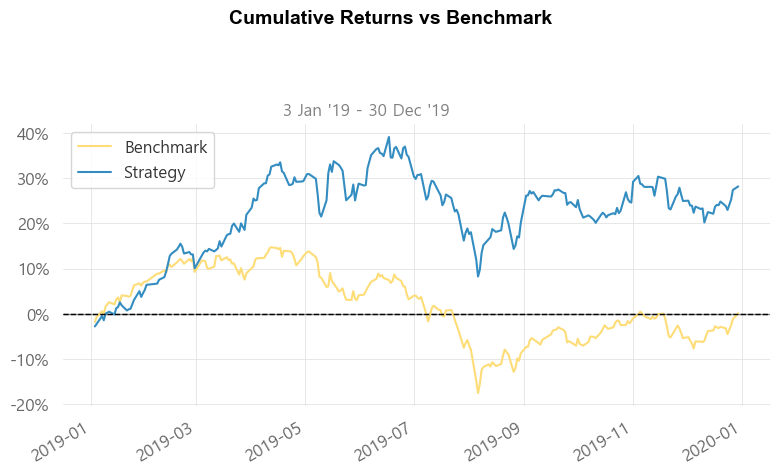

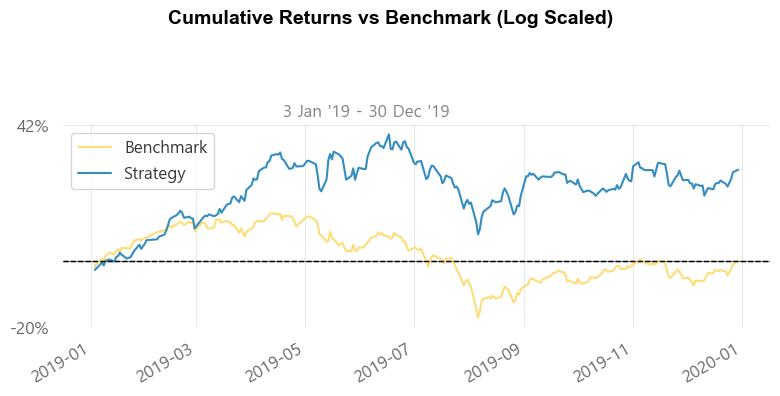

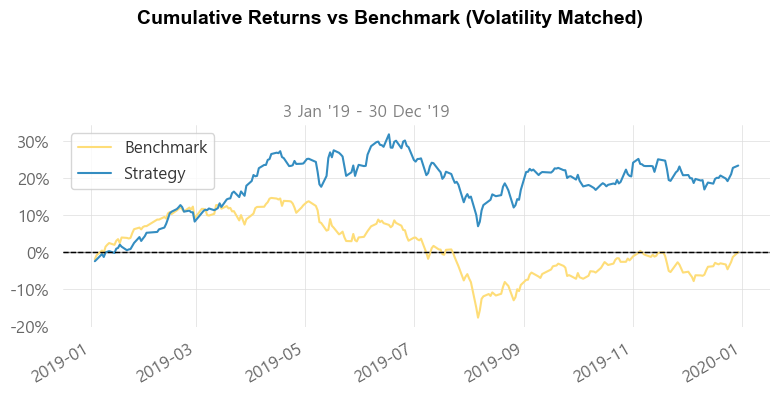

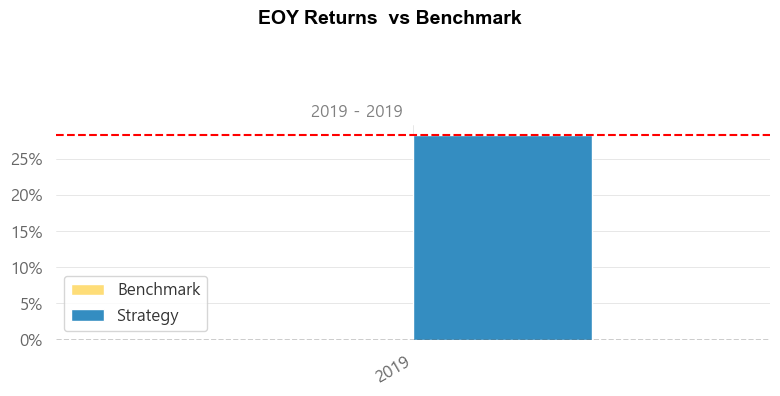

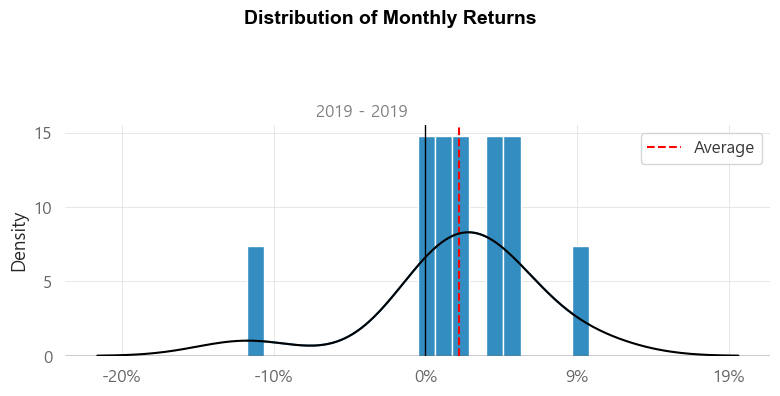

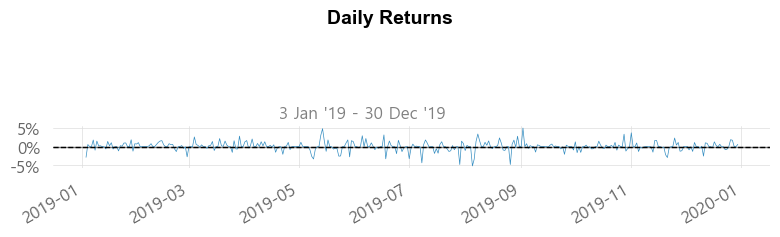

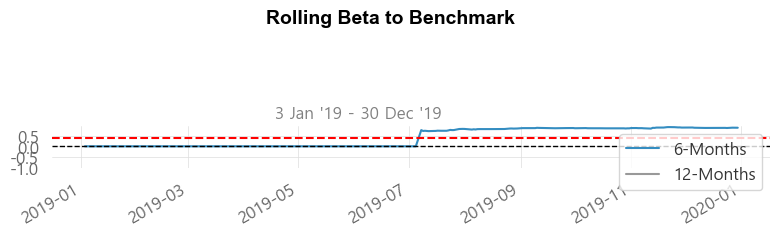

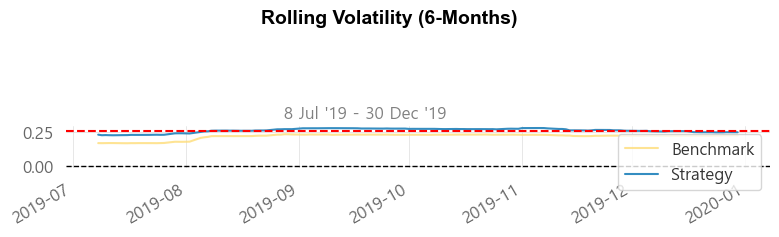

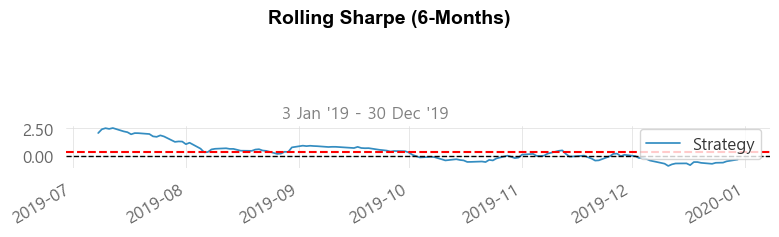

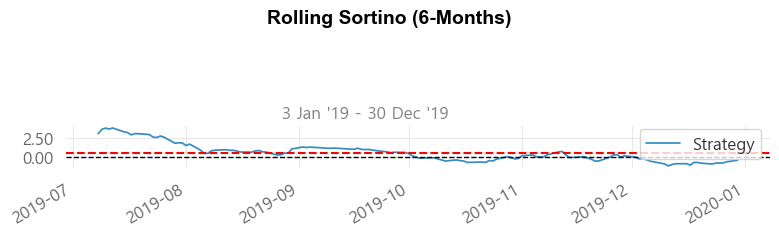

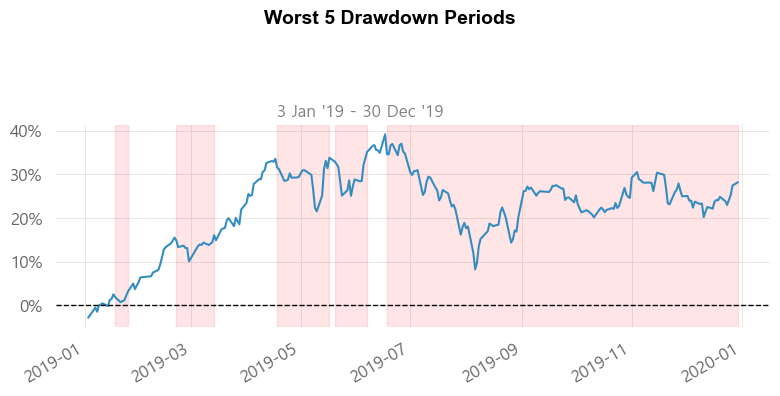

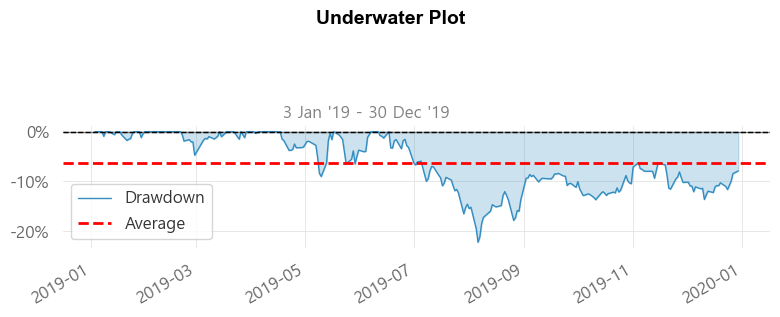

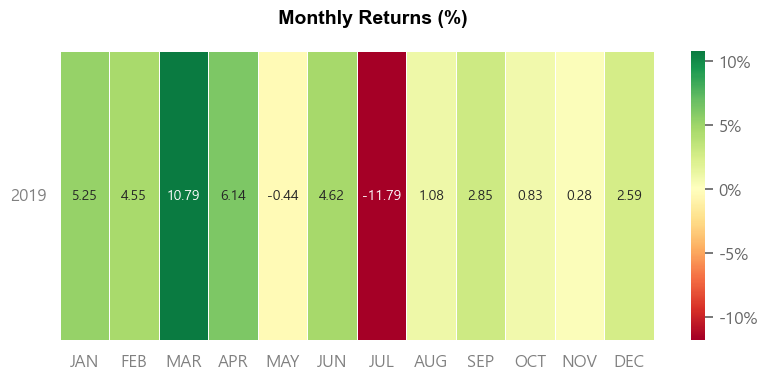

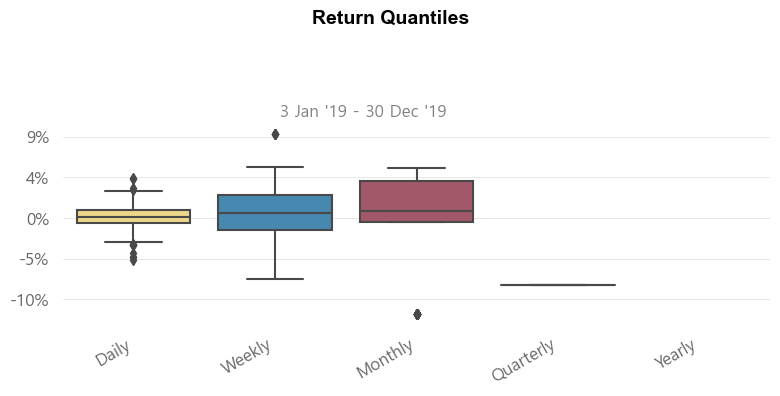

In [262]:

qs.reports.full(top10_2019_pct['포트폴리오 일일수익률'],top10_2019_pct['kosdaq'])